<h1> Microsoft Predictive Modelling </h1>

Written by: {DataSoul Team : 'G. Bignardi' , 'G. Donoso Gonzalez' , 'A. La Corte'}

In [1]:

#Imports
import numpy as np

#Load the dataset train and test datasets
train_set = np.genfromtxt ("./datasets/train2.txt", delimiter="|", skip_header=1, 
                     dtype=["S8", int, "S7", int, int, int, int, int] ,
                     names = ["ID_Customer","Cod_Prod","Cod_Fecha","Socio_Demo_01","Socio_Demo_02","Socio_Demo_03","Socio_Demo_04","Socio_Demo_05"]
                     )


test_set = np.genfromtxt ("./datasets/test2.txt", delimiter="|", skip_header=1, 
                     dtype=["S8", int, "S7", int, int, int, int, int] ,
                     names = ["ID_Customer","Cod_Prod","Cod_Fecha","Socio_Demo_01","Socio_Demo_02","Socio_Demo_03","Socio_Demo_04","Socio_Demo_05"]
                     )



In [2]:
print test_set.shape
print train_set.shape

(1147687,)
(3350601,)


In [3]:
#Load the dataset mini train and mini test
#train_set = np.genfromtxt ("./datasets/miniTrain.txt", delimiter="|", skip_header=1, 
#                     dtype=[np.int, int, "S7", int, int, int, int, int] ,
#                     names = ["ID_Customer","Cod_Prod","Cod_Fecha","Socio_Demo_01","Socio_Demo_02","Socio_Demo_03","Socio_Demo_04","Socio_Demo_05"]
#                     )


#test_set = np.genfromtxt ("./datasets/miniTest.txt", delimiter="|", skip_header=1, 
#                     dtype=[np.int, int, "S7", int, int, int, int, int] ,
#                     names = ["ID_Customer","Cod_Prod","Cod_Fecha","Socio_Demo_01","Socio_Demo_02","Socio_Demo_03","Socio_Demo_04","Socio_Demo_05"]
#                     )

#print train_set.shape
#print test_set.shape

In [4]:
#Obtain a matrix with only the socio_demo columns

matrix = np.array(train_set["Socio_Demo_01"])

matrix = np.column_stack( (matrix, train_set["Socio_Demo_02"], train_set["Socio_Demo_03"], 
                           train_set["Socio_Demo_04"], train_set["Socio_Demo_05"] ) )

print matrix[0:10, :]

[[5 4 3 1 0]
 [5 4 3 1 0]
 [5 4 3 1 0]
 [5 4 3 1 0]
 [5 4 3 1 0]
 [5 5 1 1 0]
 [5 5 1 1 0]
 [5 5 1 1 0]
 [5 5 1 1 0]
 [5 5 5 2 0]]


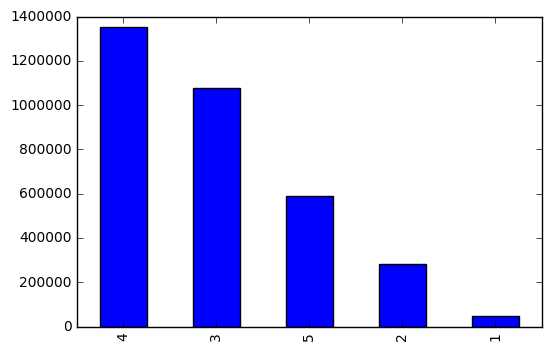

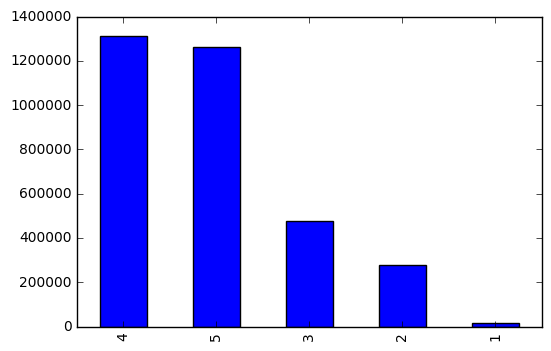

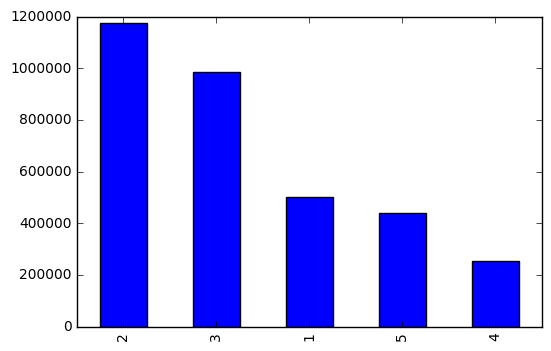

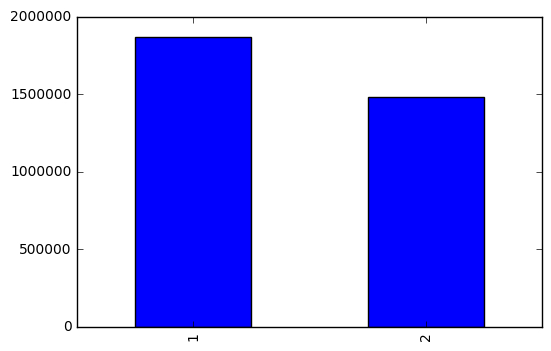

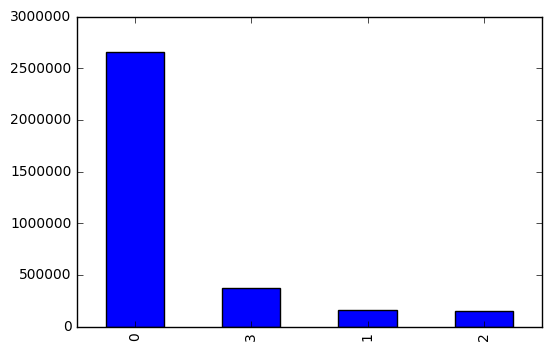

In [5]:
#Plotting graphs to understand better the data
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(matrix)
df.columns = ["Socio_Demo_01", "Socio_Demo_02", "Socio_Demo_03", "Socio_Demo_04", "Socio_Demo_05"]

df.Socio_Demo_01.value_counts().plot(kind='bar')
plt.show()

df.Socio_Demo_02.value_counts().plot(kind='bar')
plt.show()

df.Socio_Demo_03.value_counts().plot(kind='bar')
plt.show()

df.Socio_Demo_04.value_counts().plot(kind='bar')
plt.show()

df.Socio_Demo_05.value_counts().plot(kind='bar')
plt.show()


In [6]:
# get distinct products and their total number
prods = np.unique(train_set['Cod_Prod'])
print 'the number of distinct products is %s:\n %s' %(len(prods),prods)

the number of distinct products is 94:
 [ 101  102  103  104  201  301  502  503  504  506  601  702  703  704  705
  706  707  708  801  803  804 1001 1002 1004 1005 1006 1007 1008 1009 1010
 1011 1012 1013 1014 1015 1017 1019 1020 1021 1022 1301 1302 1303 1304 1305
 1306 1307 1308 1309 1310 1311 1312 1401 1501 1801 1802 1803 1804 1805 1806
 2102 2103 2104 2105 2106 2201 2202 2203 2204 2205 2206 2301 2302 2401 2501
 2502 2503 2601 2602 2701 2702 2703 2704 2705 2706 2707 2801 2901 3001 3101
 3401 9991 9992 9993]


In [7]:
# get distinct IDs and their total number
IDs = np.unique(train_set['ID_Customer'])
print 'the number of distinct IDs is %s:\n %s' %(len(IDs), IDs)

the number of distinct IDs is 676370:
 ['A0000001' 'A0000002' 'A0000003' ..., 'A0676368' 'A0676369' 'A0676370']


In [8]:
# evident that there are more ids than prods, then some prods are bought by more than on person
# let's group ID by products in a dictionary
prod_dict = {}
for prod in prods:
    prod_dict[prod]= train_set[train_set['Cod_Prod']==prod]['ID_Customer']

In [9]:
prod_dict[101]

array(['A0000815', 'A0004731', 'A0009160', 'A0012679', 'A0039581',
       'A0062924', 'A0066534', 'A0071013', 'A0077489', 'A0126318',
       'A0134175', 'A0134565', 'A0153504', 'A0153915', 'A0154401',
       'A0154644', 'A0155871', 'A0157057', 'A0157925', 'A0158517',
       'A0160976', 'A0161289', 'A0161524', 'A0165809', 'A0166083',
       'A0166351', 'A0169917', 'A0172018', 'A0172193', 'A0175713',
       'A0176473', 'A0179211', 'A0210412', 'A0236819', 'A0270400',
       'A0271059', 'A0275845', 'A0289742', 'A0336841', 'A0339663',
       'A0347540', 'A0351817', 'A0352595', 'A0365584', 'A0370757',
       'A0372140', 'A0374124', 'A0374545', 'A0378227', 'A0382162',
       'A0383003', 'A0388129', 'A0397188', 'A0397483', 'A0401429',
       'A0420331', 'A0426066', 'A0438684', 'A0438961', 'A0439144',
       'A0439266', 'A0439488', 'A0439635', 'A0439834', 'A0439835',
       'A0439837', 'A0440124', 'A0440217', 'A0440241', 'A0440294',
       'A0440338', 'A0440439', 'A0440480', 'A0440507', 'A04405

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# from each cathegorical variable with n different values I obtain n different binary columns.

enc = OneHotEncoder()
enc.fit(matrix)
print enc.n_values_
print enc.feature_indices_
encoded = enc.transform(matrix).toarray()
print(encoded)

[6 6 6 3 4]
[ 0  6 12 18 21 25]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


### Let's cluster !

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_jobs=-1).fit(encoded)
kmeans.labels_

array([4, 4, 4, ..., 6, 6, 6], dtype=int32)

In [13]:
dense = kmeans.transform(encoded)
closest_cluster = kmeans.predict(encoded)
closest_cluster.shape
np.unique(closest_cluster)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

#### We've obtained 8 different clusters from the sociodemographic variables

Let's try to see if the products were generally bought by people from the same cluster

In [15]:
# first add cluster column to train
from numpy.lib import recfunctions as rfn
train_set = rfn.append_fields(train_set, names='Cluster', data=closest_cluster, usemask=False)

In [16]:
prod_dict2 = {}
for prod in prods:
    prod_dict2[prod]= train_set[train_set['Cod_Prod']==prod]['Cluster']

In [17]:
prod_dict2[101]

array([2, 6, 0, 5, 2, 1, 1, 2, 6, 2, 1, 4, 5, 5, 5, 2, 2, 0, 5, 4, 7, 2, 5,
       5, 0, 4, 2, 0, 0, 2, 5, 2, 4, 1, 2, 1, 2, 2, 3, 0, 1, 3, 7, 2, 2, 4,
       3, 1, 4, 6, 1, 3, 3, 6, 7, 7, 6, 2, 2, 0, 2, 2, 1, 0, 5, 5, 0, 0, 5,
       0, 2, 2, 2, 2, 0, 2, 0, 7, 2, 0, 2, 7, 7, 0, 2, 2, 5, 7, 5, 2, 0, 0,
       0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 7, 2, 0, 5, 7, 2, 2,
       7, 7, 5, 0, 0, 0, 2, 0, 0, 2, 5, 2, 0, 0, 0, 0, 6, 0, 2, 5, 7, 5, 2,
       7, 1, 7, 7, 7, 7, 7, 0, 7, 7, 2, 2, 2, 2, 6, 7, 2, 1, 2, 1, 6, 2, 2,
       2, 4, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 6, 2, 6, 2, 2,
       2, 3, 4, 6, 6, 2, 2, 7, 2, 2, 2, 4, 2, 1, 1, 6, 2, 5, 5, 7, 7, 2, 7,
       2, 2, 2, 2, 2, 1, 1, 6, 4, 2, 1, 2, 1, 7, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 7, 2, 5, 5, 2, 5, 2, 0, 7, 4, 3, 0, 0, 0, 7, 5, 7, 7, 2, 0, 0,
       0, 5, 7, 5, 2, 0, 2, 5], dtype=int32)

In [18]:
prod_dict2[2601]

array([1, 6, 7, ..., 2, 1, 4], dtype=int32)

#### Well, obviously, it wasn't that simple...

### We proceed to clean some variables like Cod_Fecha and ID, so that we can apply some ml algorithm 

+ #### First we compute the time lapse distances between the purchases of products from a benchmark 'centroid' date. Given that we're considering financial products the daily conditions can strongly influence the volountee of a client to buy or not.

In [19]:
train_set['Cod_Fecha']
# transform it...

#import re #regex
#regexp = '^\d*'
#selection = ([bool(re.search(regexp, ))])
#train_set['Cod_Fecha'] = re.sub(".", "^\d*", train_set['Cod_Fecha'])

array(['2007-05', '2013-04', '2006-03', ..., '2015-07', '2015-11',
       '2015-11'], 
      dtype='|S7')

In [20]:
for i in range(0,len(train_set)-1):
    if i==3350600:
        train_set['Cod_Fecha'][i]=np.datetime64(train_set['Cod_Fecha'][i])-np.datetime64(train_set['Cod_Fecha'][i])
    else:
        train_set['Cod_Fecha'][i]=np.datetime64(train_set['Cod_Fecha'][i])-np.datetime64(train_set['Cod_Fecha'][i+1])
train_set['Cod_Fecha'][3350600]=np.datetime64(train_set['Cod_Fecha'][3350600])-np.datetime64(train_set['Cod_Fecha'][3350600])    

In [21]:
train_set['Cod_Fecha']

array(['-71 mon', '85 mont', '0 month', ..., '-4 mont', '0 month',
       '0 month'], 
      dtype='|S7')

In [22]:
aux = map(lambda s: s.replace('month' , ' '), train_set['Cod_Fecha'])
aux = map(lambda s: s.replace('mont' , ' '), aux)
aux = map(lambda s: s.replace('mon' , ' '), aux)
aux = map(lambda s: s.replace('mo' , ' '), aux)
aux=map(int, aux)

Date_distances = np.ndarray((len(aux),), dtype=int)

for i in range(0, len(aux)):
    Date_distances[i,]=aux[i]

#We can't change existing byte size of colukn, add new with 'date distances'
train_set = rfn.append_fields(train_set, names='Date_distances', data=Date_distances, usemask=False)

In [23]:
train_set[1:10] # here is how the train_set looks

array([('A0000001', 704, '85 mont', 5, 4, 3, 1, 0, 4, 85),
       ('A0000001', 2501, '0 month', 5, 4, 3, 1, 0, 4, 0),
       ('A0000001', 2503, '-61 mon', 5, 4, 3, 1, 0, 4, -61),
       ('A0000001', 1011, '154 mon', 5, 4, 3, 1, 0, 4, 154),
       ('A0000002', 601, '-92 mon', 5, 5, 1, 1, 0, 0, -92),
       ('A0000002', 801, '-108 mo', 5, 5, 1, 1, 0, 0, -108),
       ('A0000002', 9992, '239 mon', 5, 5, 1, 1, 0, 0, 239),
       ('A0000002', 301, '112 mon', 5, 5, 1, 1, 0, 0, 112),
       ('A0000003', 601, '-318 mo', 5, 5, 5, 2, 0, 0, -318)], 
      dtype=[('ID_Customer', 'S8'), ('Cod_Prod', '<i8'), ('Cod_Fecha', 'S7'), ('Socio_Demo_01', '<i8'), ('Socio_Demo_02', '<i8'), ('Socio_Demo_03', '<i8'), ('Socio_Demo_04', '<i8'), ('Socio_Demo_05', '<i8'), ('Cluster', '<i4'), ('Date_distances', '<i8')])

***
***

+ #### Groups' preferences on products = Now, for each of the 94 product we do a search to see from whic ID_groups (within the previously calculated 8 clusters) it was acquired the most. Then we add a column to train_set

In [24]:
# from dict2, get for every product which was the cluster that acquired it the most
for key in prod_dict2:
    counts = np.bincount(prod_dict2[key])
    prod_dict2[key] = np.argmax(counts)
    
products_ord = train_set['Cod_Prod']
for i in range(0, len(products_ord)):
    products_ord[i]=prod_dict2[train_set['Cod_Prod'][i]]

train_set = rfn.append_fields(train_set, names='Product_Cluster', data=products_ord, usemask=False)

In [25]:
train_set[1:10]

array([('A0000001', 0, '85 mont', 5, 4, 3, 1, 0, 4, 85, 0),
       ('A0000001', 0, '0 month', 5, 4, 3, 1, 0, 4, 0, 0),
       ('A0000001', 0, '-61 mon', 5, 4, 3, 1, 0, 4, -61, 0),
       ('A0000001', 1, '154 mon', 5, 4, 3, 1, 0, 4, 154, 1),
       ('A0000002', 4, '-92 mon', 5, 5, 1, 1, 0, 0, -92, 4),
       ('A0000002', 2, '-108 mo', 5, 5, 1, 1, 0, 0, -108, 2),
       ('A0000002', 2, '239 mon', 5, 5, 1, 1, 0, 0, 239, 2),
       ('A0000002', 0, '112 mon', 5, 5, 1, 1, 0, 0, 112, 0),
       ('A0000003', 4, '-318 mo', 5, 5, 5, 2, 0, 0, -318, 4)], 
      dtype=[('ID_Customer', 'S8'), ('Cod_Prod', '<i8'), ('Cod_Fecha', 'S7'), ('Socio_Demo_01', '<i8'), ('Socio_Demo_02', '<i8'), ('Socio_Demo_03', '<i8'), ('Socio_Demo_04', '<i8'), ('Socio_Demo_05', '<i8'), ('Cluster', '<i4'), ('Date_distances', '<i8'), ('Product_Cluster', '<i8')])

+ #### Clean the ID column

In [26]:
# remove letter A from IDs

aux2 = map(lambda s: s.replace('A' , ''), train_set['ID_Customer'])

IDs = np.ndarray((len(aux2),), dtype=int)

for i in range(0, len(aux2)):
    IDs[i,]=aux2[i]

#We can't change existing byte size of colukn, add new
train_set = rfn.append_fields(train_set, names='IDs', data=IDs, usemask=False)

## Classifification

In [35]:
from sklearn import model_selection
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingClassifier
from sklearn import metrics
from sklearn.cross_validation import KFold, cross_val_score
from scipy.stats import sem

In [28]:
classification = ['IDs',
                  'Socio_Demo_01','Socio_Demo_02','Socio_Demo_03','Socio_Demo_04','Socio_Demo_05',
                 'Cluster','Date_distances','Product_Cluster']

classification2 = ['IDs','Cluster','Date_distances','Product_Cluster']

x_train = pd.DataFrame(train_set[classification])
y_train = train_set['Cod_Prod']

x_train2 = pd.DataFrame(train_set[classification2])

In [ ]:
param_grid = {'n_neighbors': range(2,10,4), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}

np.random.seed(0)
knn = GridSearchCV(KNeighborsClassifier(), 
                   param_grid,
                   scoring='accuracy',
                   cv=3 , n_jobs=-1, verbose=1) #no verbose 

cv = KFold(x_train2.shape[0], 10, shuffle=True, random_state=0)
#knn.fit(x_train2,y_train)
scores = -cross_val_score(knn, 
                            x_train2, y_train, 
                            scoring='accuracy', n_jobs = -1,
                            cv = cv)

#print'\n%s, yelds an accuracy of %.3f' %(knn.best_params_, knn.best_score_)

#print'Thus an optimal combination of hyper-parameters for KNN is using the %s algorithm with k = %s'%(knn.best_params_['algorithm'], knn.best_params_['n_neighbors'])

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [57]:
clf = tree.DecisionTreeClassifier()

clf.fit(x_train, y_train)

cv = KFold(n = x_train.shape[0], n_folds = 10, shuffle=True, random_state=0) #iris.data is X

scores = cross_val_score(clf, 
                         x_train, y_train, 
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=cv)

# use average accuracy as an estimate of out-of-sample accuracy
print ("Mean score: {0:.3f} (+/-{1:.3f})").format(scores.mean(), sem(scores))

Mean score: 1.000 (+/-0.000)


In [56]:
clf2 = tree.DecisionTreeClassifier()

clf2.fit(x_train2, y_train)

cv = KFold(n = x_train2.shape[0], n_folds = 10, shuffle=True, random_state=0) #iris.data is X

scores = cross_val_score(clf2, 
                         x_train2, y_train, 
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=cv)

# use average accuracy as an estimate of out-of-sample accuracy
print ("Mean score: {0:.3f} (+/-{1:.3f})").format(scores.mean(), sem(scores))

Mean score: 1.000 (+/-0.000)


***
***

In [52]:
# Transform the test_set so that the algorithm can be applied

matrix = np.array(test_set["Socio_Demo_01"])

matrix = np.column_stack( (matrix, test_set["Socio_Demo_02"], test_set["Socio_Demo_03"], 
                                test_set["Socio_Demo_04"], test_set["Socio_Demo_05"] ) )

enc = OneHotEncoder()
enc.fit(matrix)
encoded = enc.transform(matrix).toarray()
print(encoded)

# let's cluster !
kmeans = KMeans(n_jobs=-1).fit(encoded)
kmeans.labels_

dense = kmeans.transform(encoded)
closest_cluster = kmeans.predict(encoded)
closest_cluster.shape
np.unique(closest_cluster)

# first add cluster column to test
from numpy.lib import recfunctions as rfn
test_set = rfn.append_fields(test_set, names='Cluster', data=closest_cluster, usemask=False)

for i in range(0,len(test_set)-1):
    if i==1147686:
        test_set['Cod_Fecha'][i]=np.datetime64(test_set['Cod_Fecha'][i])-np.datetime64(test_set['Cod_Fecha'][i])
    else:
        test_set['Cod_Fecha'][i]=np.datetime64(test_set['Cod_Fecha'][i])-np.datetime64(test_set['Cod_Fecha'][i+1])
test_set['Cod_Fecha'][1147686]=np.datetime64(test_set['Cod_Fecha'][1147686])-np.datetime64(test_set['Cod_Fecha'][1147686])    

aux = map(lambda s: s.replace('month' , ' '), test_set['Cod_Fecha'])
aux = map(lambda s: s.replace('mont' , ' '), aux)
aux = map(lambda s: s.replace('mon' , ' '), aux)
aux = map(lambda s: s.replace('mo' , ' '), aux)
aux=map(int, aux)

Date_distances = np.ndarray((len(aux),), dtype=int)

for i in range(0, len(aux)):
    Date_distances[i,]=aux[i]

#We can't change existing byte size of colukn, add new
test_set = rfn.append_fields(test_set, names='Date_distances', data=Date_distances, usemask=False)

prod_dict2 = {}
for prod in prods:
    prod_dict2[prod]= test_set[test_set['Cod_Prod']==prod]['Cluster']

# last step
# from dict2, get for every product which was the cluster that acquired it the most
for key in prod_dict2:
    counts = np.bincount(prod_dict2[key])
    prod_dict2[key] = np.argmax(counts)
    
products_ord = test_set['Cod_Prod']
for i in range(0, len(products_ord)):
    products_ord[i]=prod_dict2[test_set['Cod_Prod'][i]]

test_set = rfn.append_fields(test_set, names='Product_Cluster', data=products_ord, usemask=False)

# remove letter B from IDs

aux2 = map(lambda s: s.replace('B' , ''), test_set['ID_Customer'])

IDs = np.ndarray((len(aux2),), dtype=int)

for i in range(0, len(aux2)):
    IDs[i,]=aux2[i]

#We can't change existing byte size of colukn, add new
test_set = rfn.append_fields(test_set, names='IDs', data=IDs, usemask=False)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


In [59]:
x_test = pd.DataFrame(test_set[classification])
y_test = test_set['Cod_Prod']

x_test2 = pd.DataFrame(test_set[classification2])

y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test2)

def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

print "MAE for decision tree 1 with default parameters is {0}".format(mae(y_pred,y_test))

print "MAE for decision tree 2 with default parameters is {0}".format(mae(y_pred2,y_test))

MAE for decision tree 1 with default parameters is 0.00268888642984
MAE for decision tree 2 with default parameters is 0.00268888642984


#### The optimal solution will be to use the second classifier, that bases its decisions on sociodemograpic features clusters, products clusters and distances between purchase dates of the financial products. 

#### The use of KNN algorithm has been discarded because of long computational times. Instead we focused on gathering with the informations we had, to finally apply a decision tree classifier. The total computational time = the lapse for knn, lapse for cleaning, lapse for transforming and lapse for fitting of the decision tree. 